# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make Preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Build Model
import tensorflow as tf
import tensorflow.keras as k
from keras.layers import Embedding, Dense, GlobalAveragePooling1D

# Reading Data

In [2]:
data = pd.read_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Spam_Mail\mail_data.csv")
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
data.loc[data["Category"] == "spam", "Category"] = 1
data.loc[data["Category"] == "ham", "Category"] = 0

In [5]:
data.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Preprocessing

In [6]:
X = data["Message"]
stop_words = stopwords.words("english")

In [7]:
new_x = []
for sentence in X:
    new_word = ""
    for word in word_tokenize(sentence):
        if word.lower() not in set(stop_words): 
            new_word += word
            new_word += " "
    new_x.append(new_word)    
new_x = np.array(new_x)

In [8]:
new_x

array(['Go jurong point , crazy .. Available bugis n great world la e buffet ... Cine got amore wat ... ',
       'Ok lar ... Joking wif u oni ... ',
       "Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) & C 's apply 08452810075over18 's ",
       ..., 'Pity , * mood . ... suggestions ? ',
       "guy bitching acted like 'd interested buying something else next week gave us free ",
       'Rofl . true name '], dtype='<U667')

# Splitting & Tokenization

In [9]:
# X = data["Message"]
Y = data["Category"].astype("int32")

In [10]:
label = to_categorical(Y, 2)

In [11]:
# Tokenization
# tokenize = Tokenizer(num_words=116,oov_token="<OOV>")
tokenize = Tokenizer(oov_token="<OOV>")
tokenize.fit_on_texts(new_x)
word_index = tokenize.word_index

data_sequance = tokenize.texts_to_sequences(new_x)

# Padding_Sequances
data_padding = pad_sequences(data_sequance, maxlen=116, padding="pre", truncating="pre")

In [12]:
input_length = max(len(seq) for seq in data_sequance)

vocabulary_size = len(word_index) + 1

In [13]:
data_padding

array([[   0,    0,    0, ...,   17, 4296,   73],
       [   0,    0,    0, ...,  370,    2, 1814],
       [   0,    0,    0, ...,  300, 2862,    5],
       ...,
       [   0,    0,    0, ..., 8774, 1208, 8775],
       [   0,    0,    0, ...,  920,  128,   14],
       [   0,    0,    0, ..., 2547,  368,  184]])

In [14]:
input_length, vocabulary_size

(97, 8777)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data_padding, label, train_size=0.7, random_state=42)

# Building Model ==> Neural Network

In [16]:
model = tf.keras.models.Sequential(
    [
        Embedding(vocabulary_size, 100, input_length=116),
        GlobalAveragePooling1D(),
        Dense(128, activation="relu"),
        Dense(24, activation="relu"),
        Dense(2, activation="softmax")
    ])
model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy", "mse"])

In [17]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=2)

Epoch 1/30
122/122 - 4s - loss: 0.4138 - accuracy: 0.8659 - mse: 0.1274 - val_loss: 0.3526 - val_accuracy: 0.8660 - val_mse: 0.1059 - 4s/epoch - 35ms/step
Epoch 2/30
122/122 - 1s - loss: 0.2835 - accuracy: 0.8782 - mse: 0.0847 - val_loss: 0.1451 - val_accuracy: 0.9522 - val_mse: 0.0396 - 502ms/epoch - 4ms/step
Epoch 3/30
122/122 - 0s - loss: 0.0626 - accuracy: 0.9818 - mse: 0.0144 - val_loss: 0.0530 - val_accuracy: 0.9856 - val_mse: 0.0121 - 479ms/epoch - 4ms/step
Epoch 4/30
122/122 - 0s - loss: 0.0271 - accuracy: 0.9926 - mse: 0.0063 - val_loss: 0.0471 - val_accuracy: 0.9868 - val_mse: 0.0111 - 469ms/epoch - 4ms/step
Epoch 5/30
122/122 - 0s - loss: 0.0195 - accuracy: 0.9949 - mse: 0.0043 - val_loss: 0.0490 - val_accuracy: 0.9868 - val_mse: 0.0111 - 474ms/epoch - 4ms/step
Epoch 6/30
122/122 - 0s - loss: 0.0121 - accuracy: 0.9969 - mse: 0.0026 - val_loss: 0.0467 - val_accuracy: 0.9886 - val_mse: 0.0102 - 472ms/epoch - 4ms/step
Epoch 7/30
122/122 - 0s - loss: 0.0076 - accuracy: 0.9985 - 

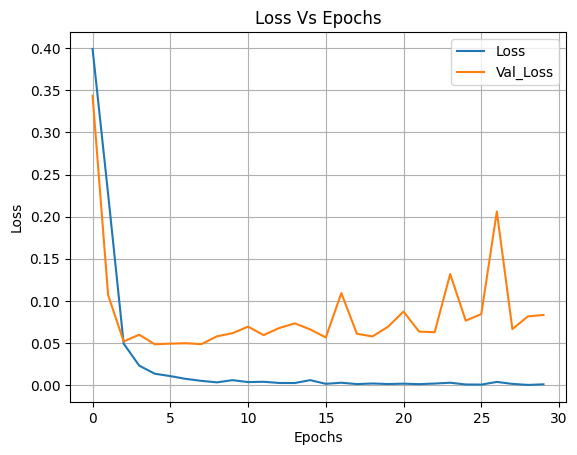

In [25]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

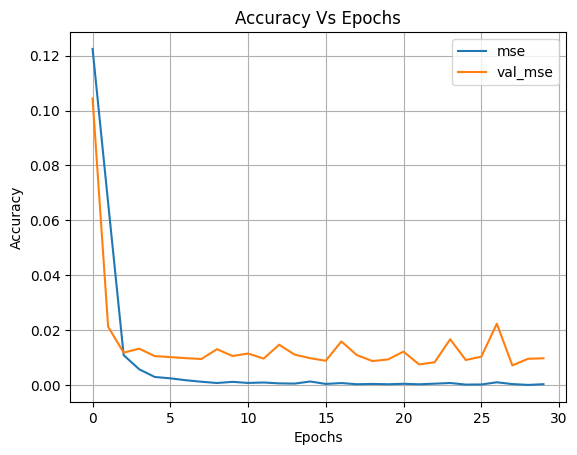

In [26]:
plt.plot(history.history["mse"], label="mse")
plt.plot(history.history["val_mse"], label="val_mse")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

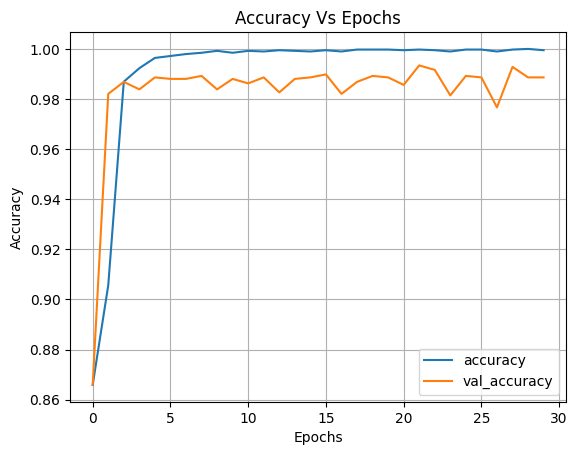

In [27]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Make System Prediction

In [45]:
text = input().split()

new_text = ""
for word in text:
    if word not in stop_words:
        new_text += word
        new_text += " "

test_sequace = tokenize.texts_to_sequences([new_text])
test_padding = pad_sequences(test_sequace, maxlen=116, padding="pre", truncating="pre")


# test_sequace
prediction = model.predict(test_padding)

if np.argmax(prediction) == 1: print("This Massage is -->  SPAM ")
else: print("This Massage is -->  HAM ")

SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
1/1 [==============================] - 0s 15ms/step
This Massage is -->  SPAM 
